## SED stats & plots

- Read SYNAGE++ results
- Plot SED and models


In [3]:
import numpy as np
import shutil
from astropy.io import ascii, fits
import fluxInt
import pbCorr
import synCl
from prettytable import PrettyTable


syn = synCl.synClean()

rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/core/'

figDir = rootDir+'coreFigs/pix/'

pixDir = rootDir+'synPix/'

label = ['ajfix06','ajfree']

syn.rootdir = rootDir

tableName = pixDir+'pixList.tbl'
table= ascii.read(tableName,format='csv')

print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


	+---------+
	 Inputs loaded
	+---------+


In [4]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms

def plot_pix(tot, mod,labe,color_plot,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-5,1e1])
    #ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='major', pad=5)
    
    # MODELS
    
    idx_max = (np.abs(mod[0] - 5e5)).argmin()
    idx_min = (np.abs(mod[0] - 30)).argmin()

    
    ax1.plot(mod[0][idx_min:idx_max],mod[1][idx_min:idx_max],lw=3, marker=' ',color=color_plot[1], 
             linestyle=':',label='JP',alpha=0.5)

    
    totplot1 = ax1.errorbar(tot['col4'],tot['col5'], yerr=tot['col6'],
             marker='o', color='red', linestyle=' ',label=r'Pix '+labe,capsize=6,markersize=10) 

    #totplot[-1][0].set_linestyle('--')
    #totplot[-1][0].set_linewidth(3)    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 20})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


/home/maccagni/programs/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


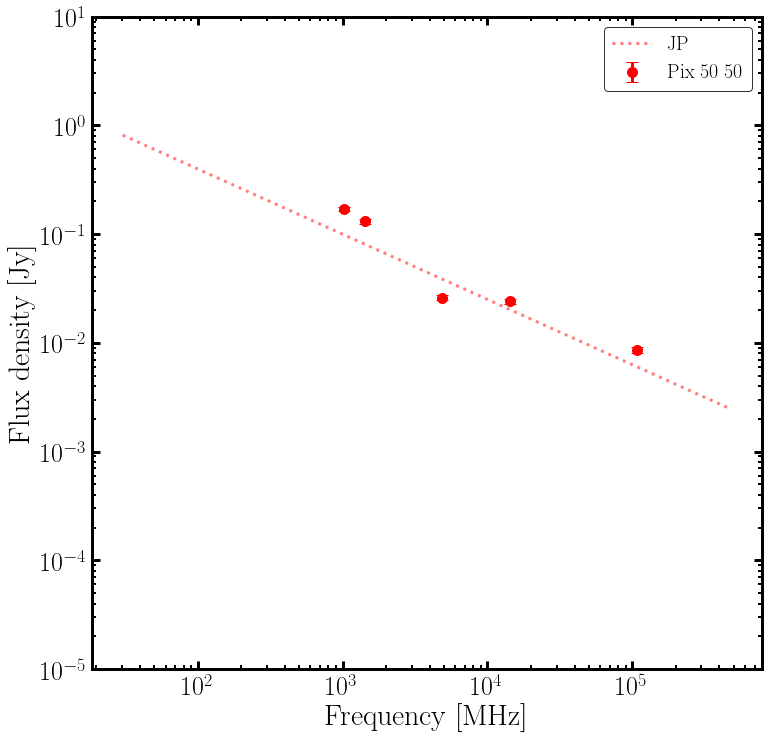

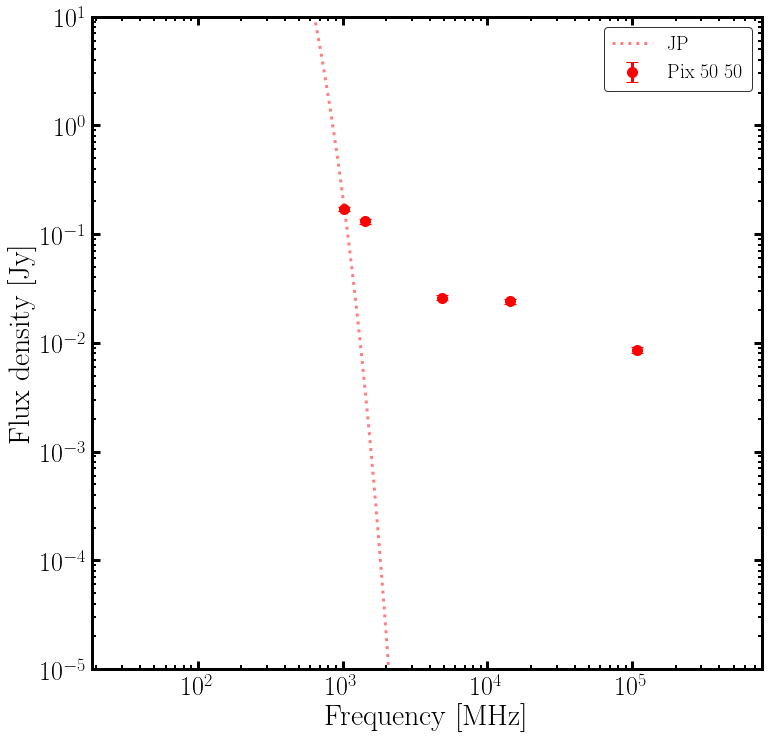

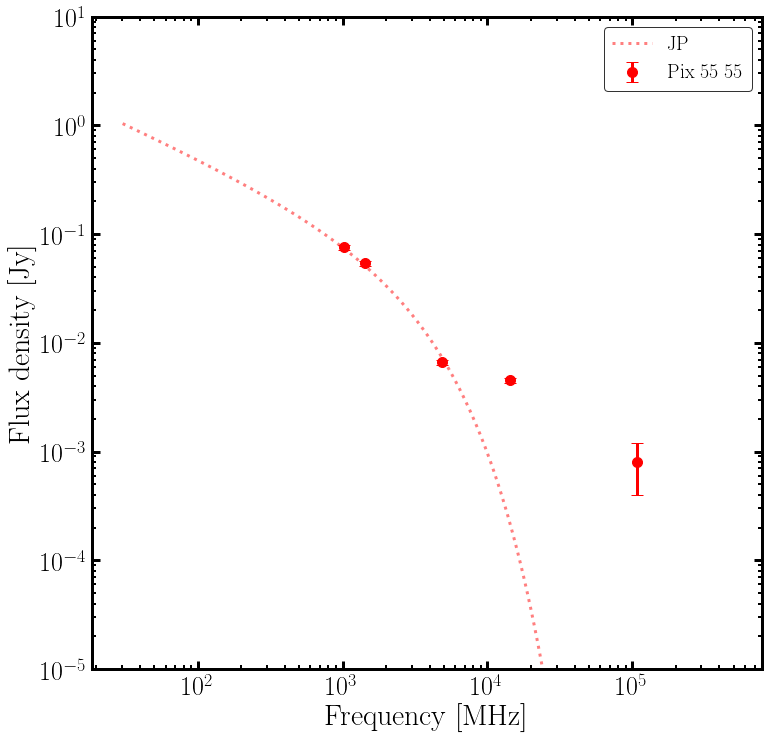

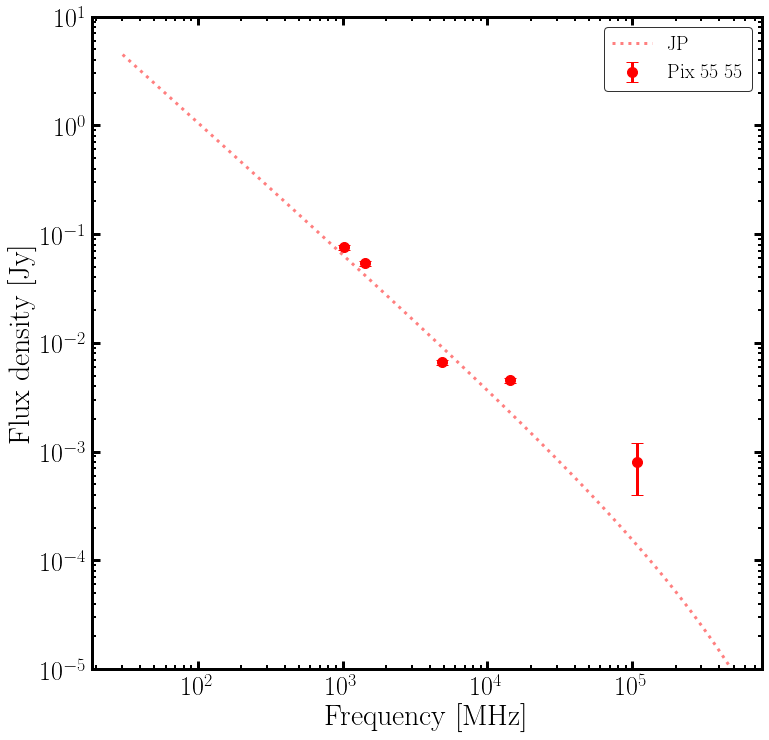

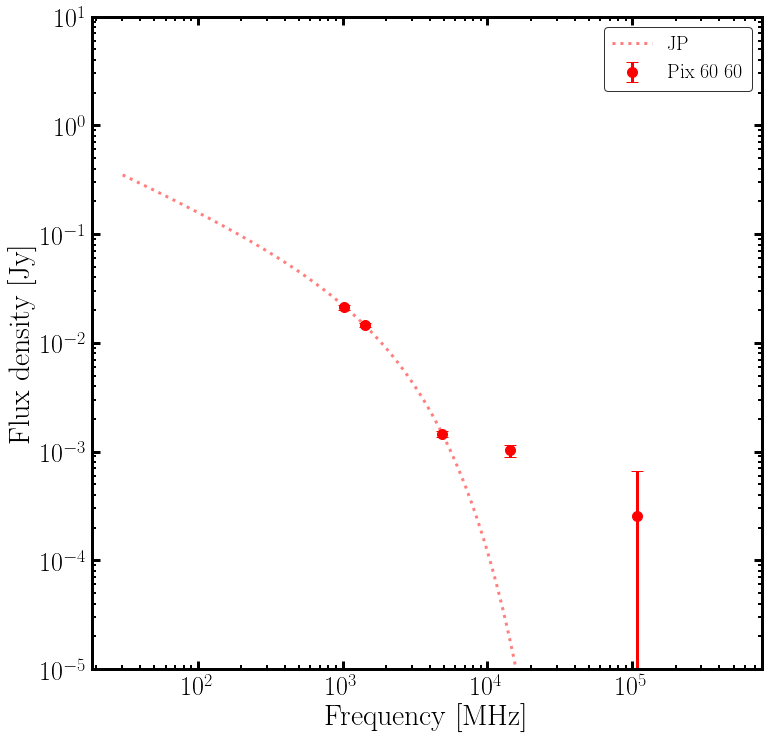

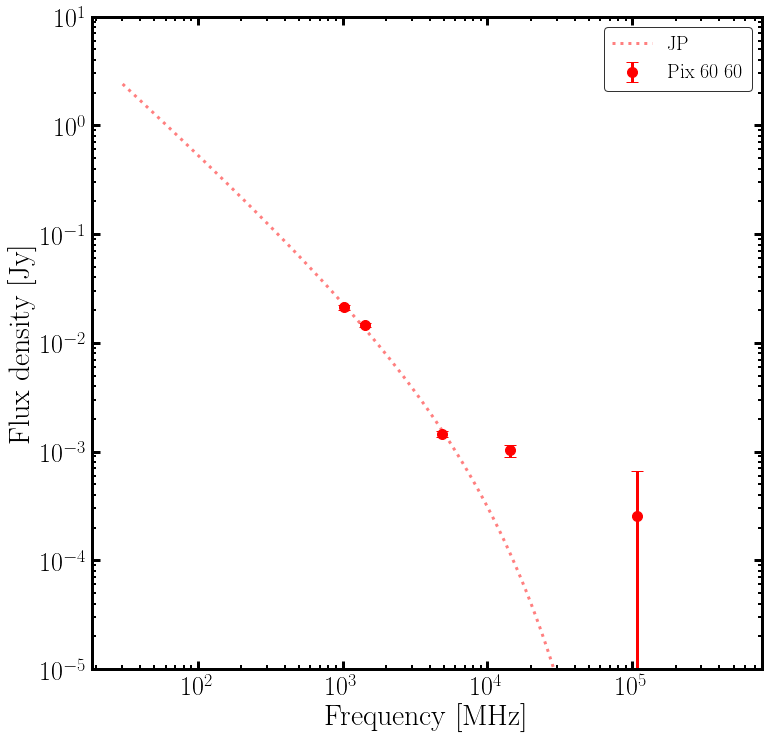

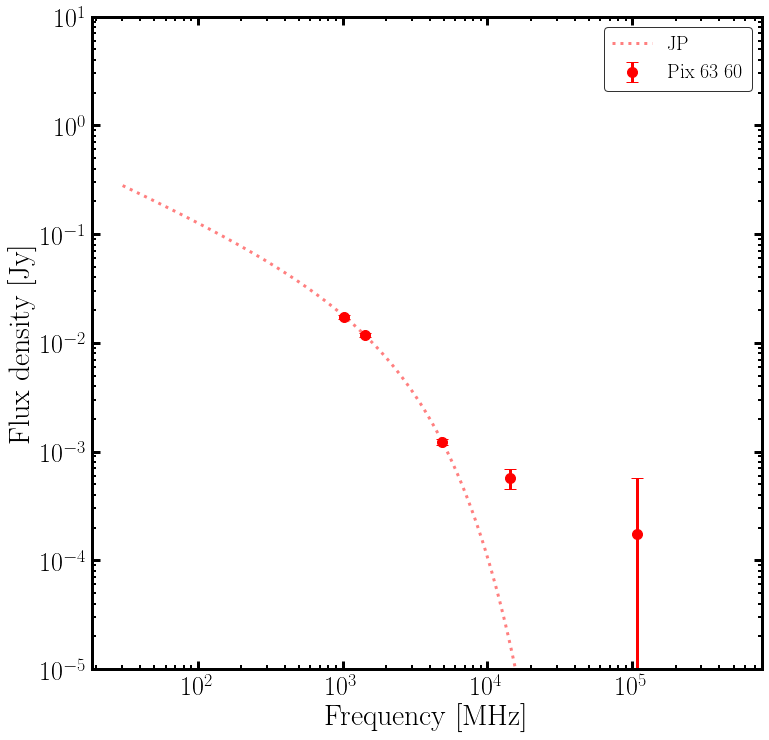

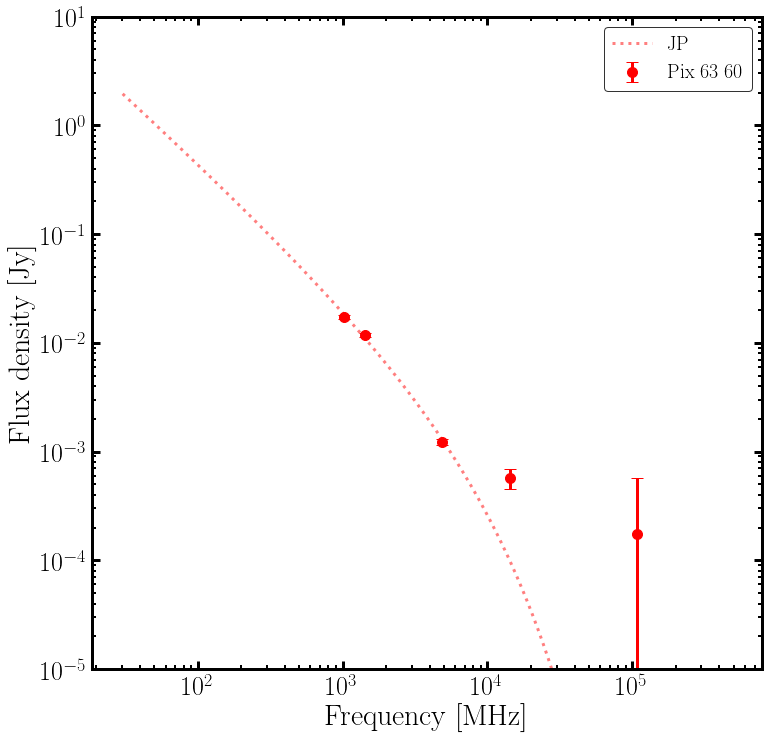

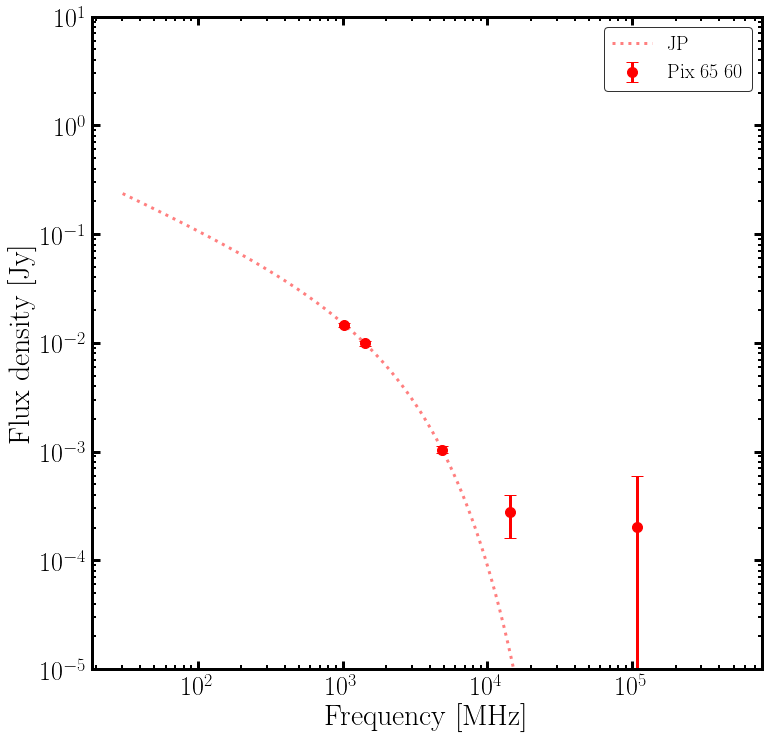

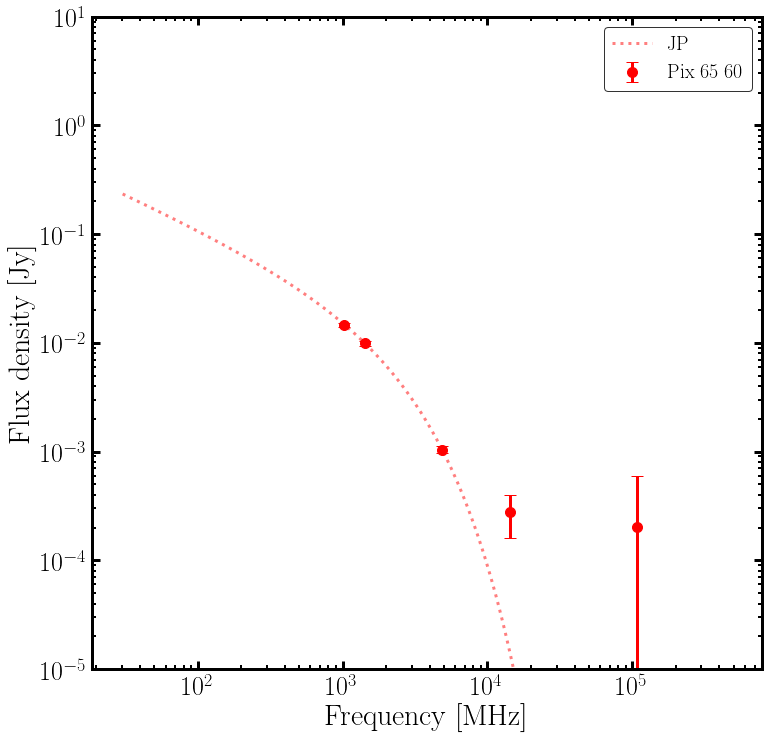

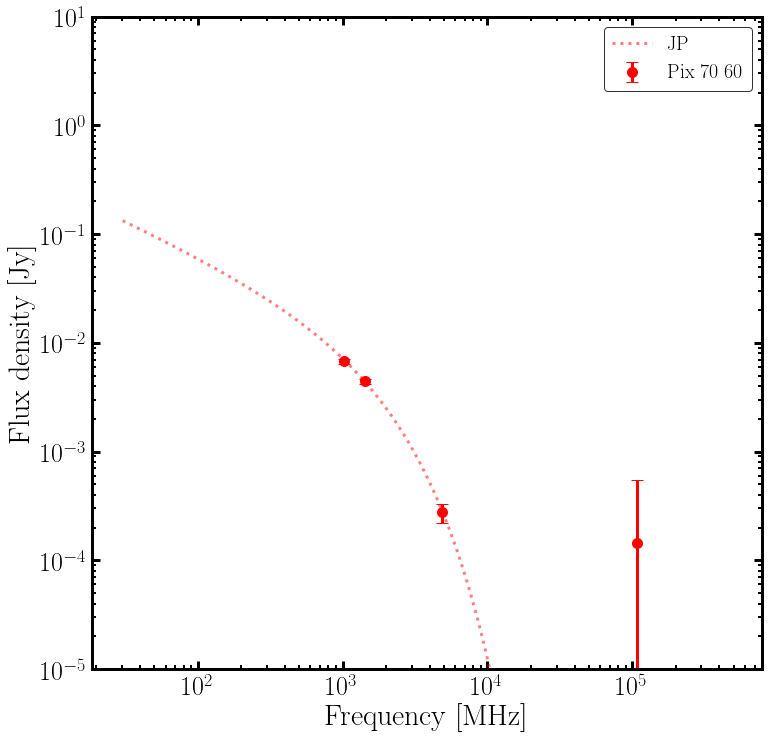

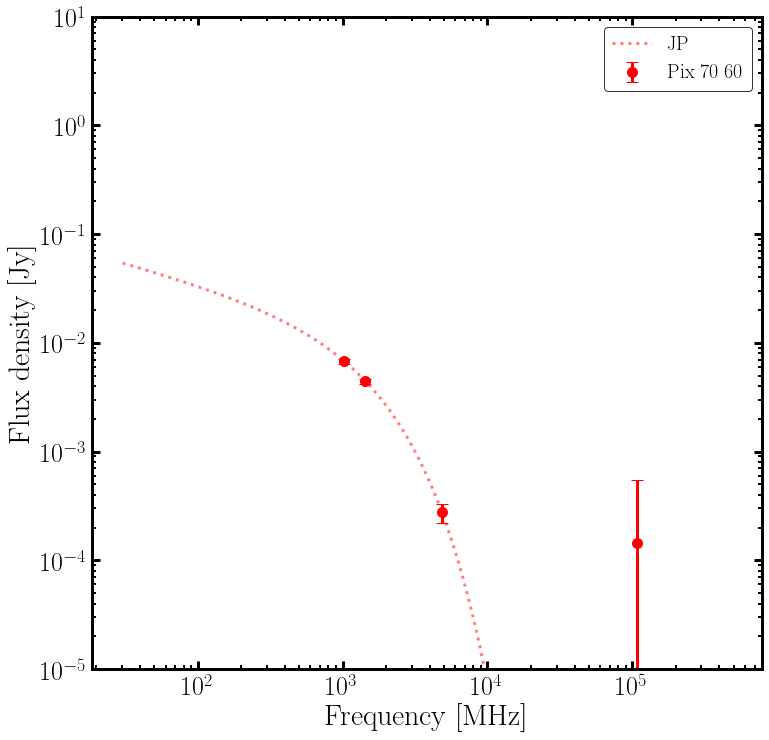

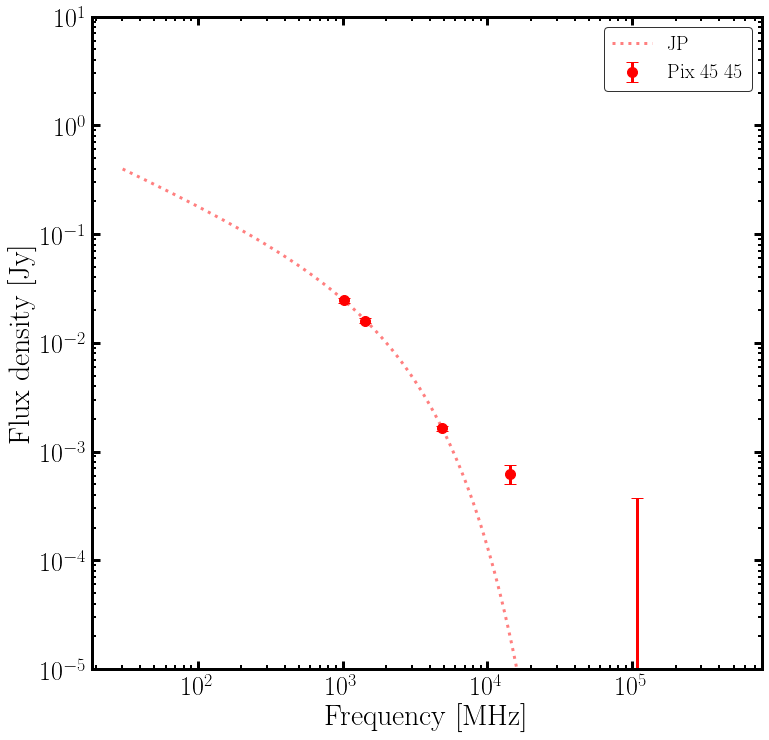

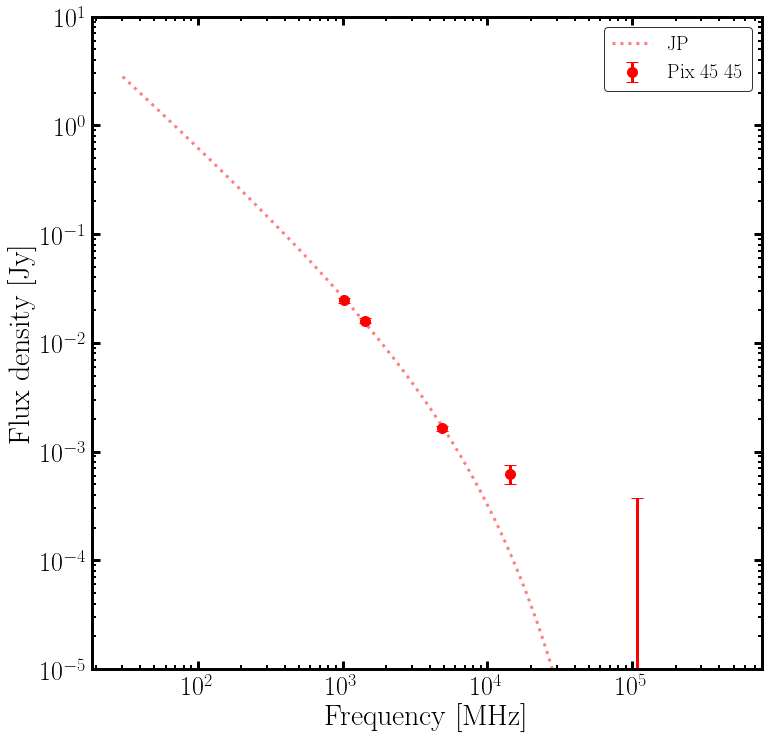

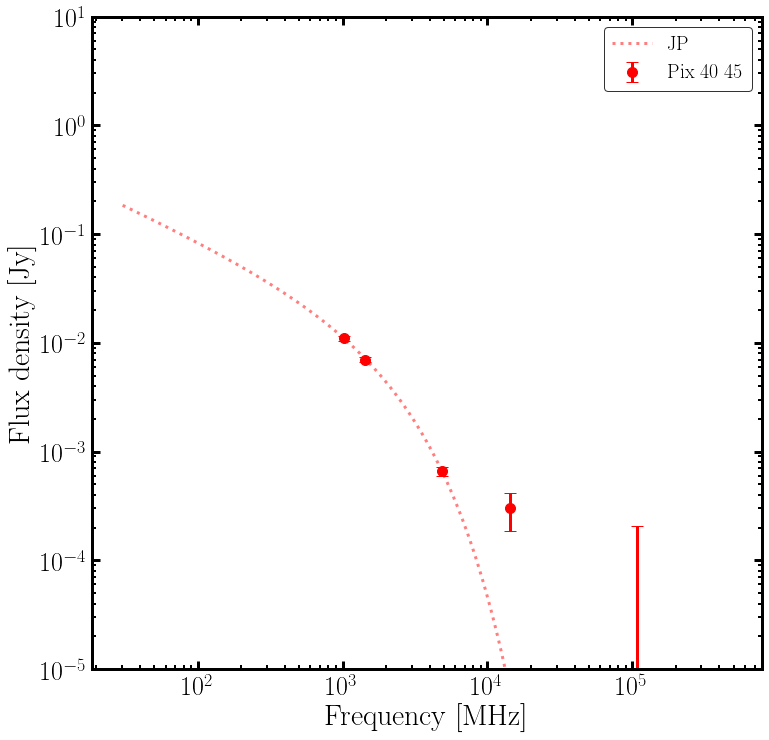

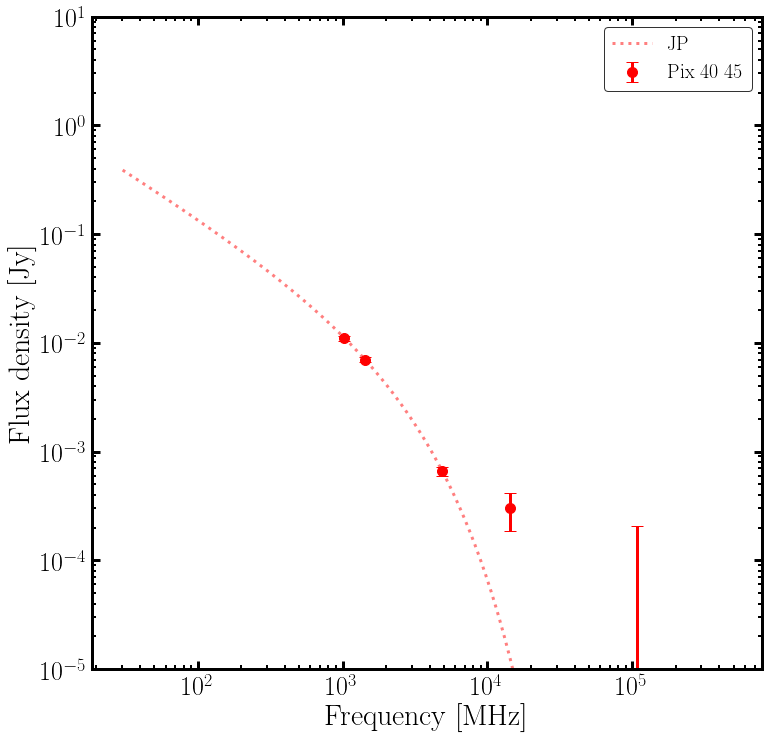

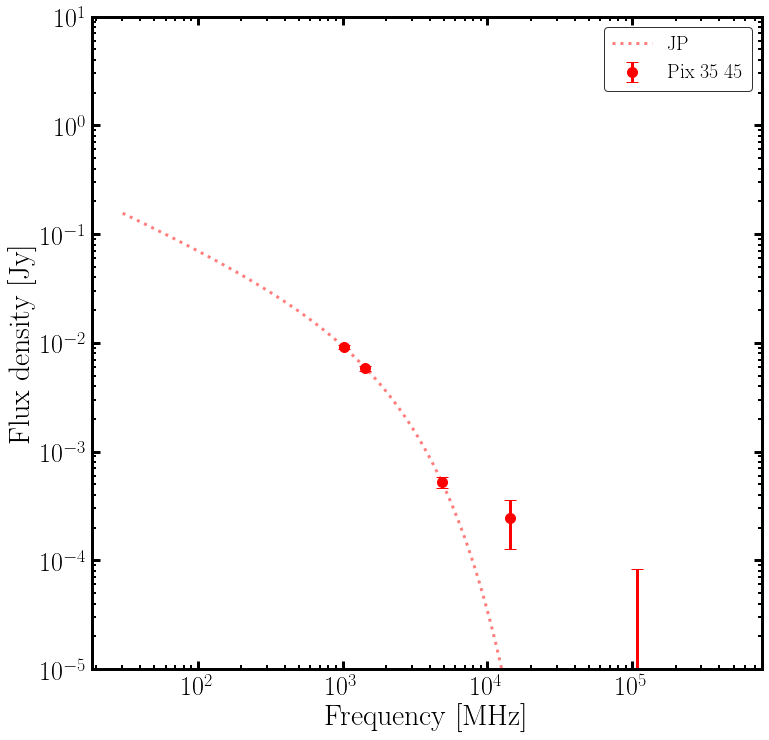

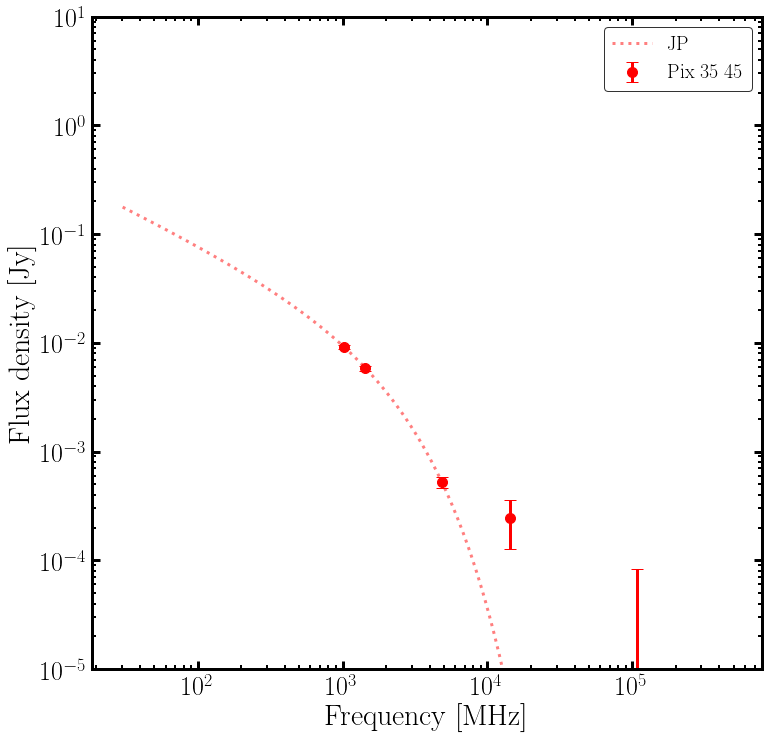

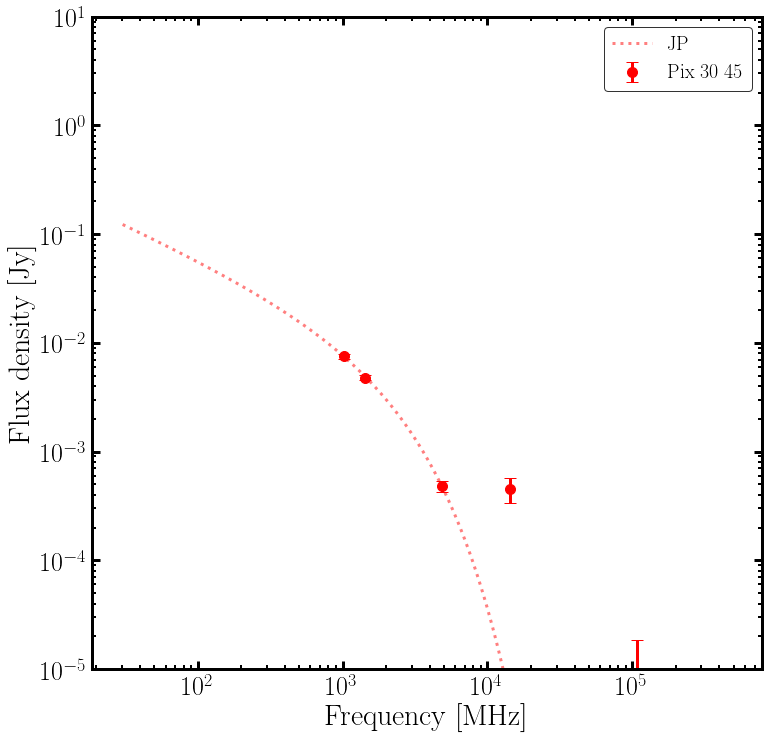

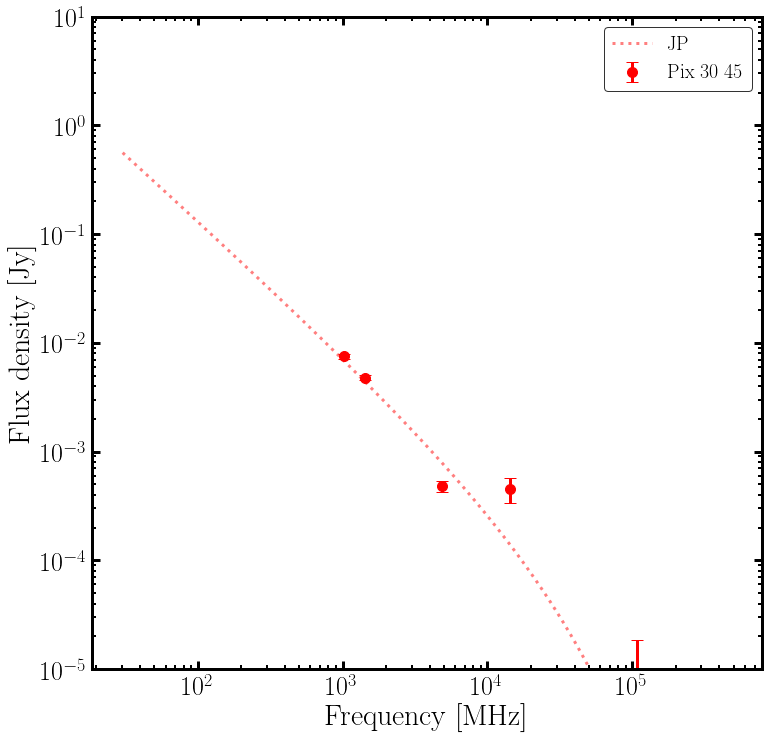

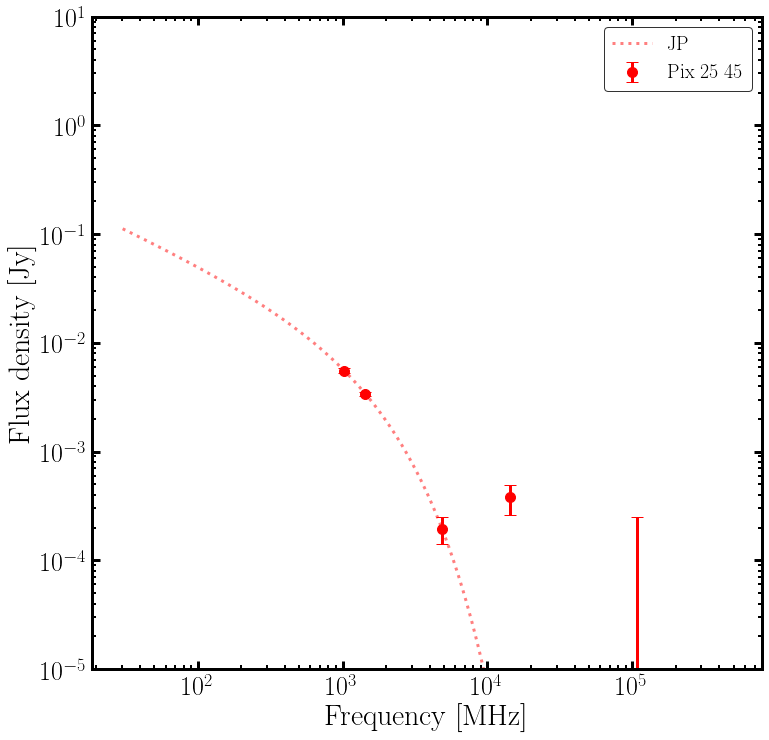

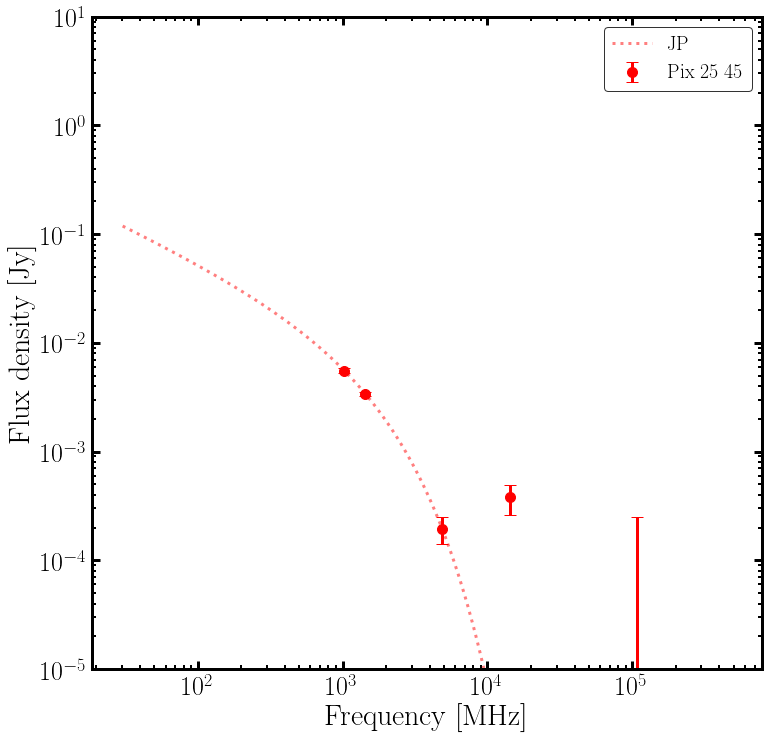

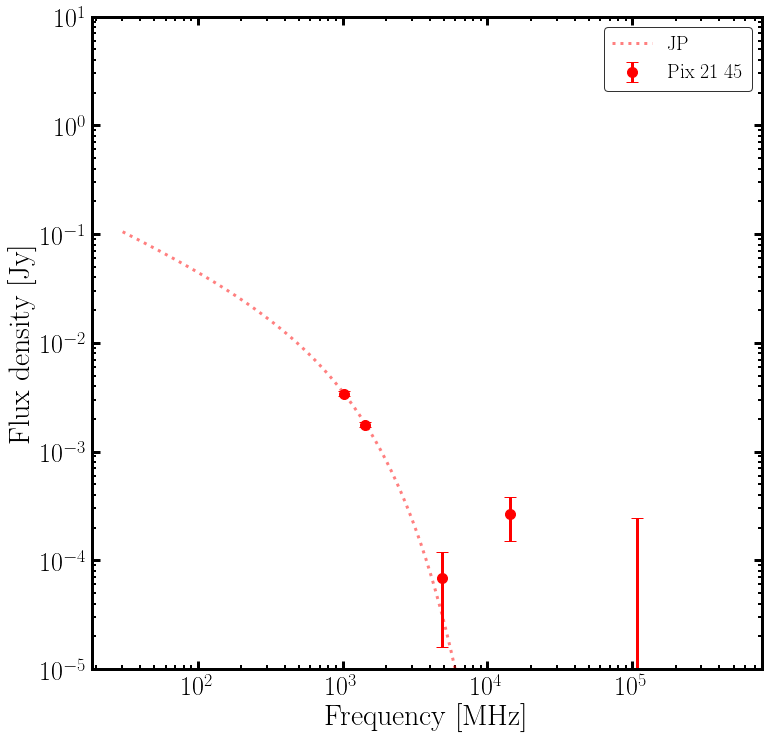

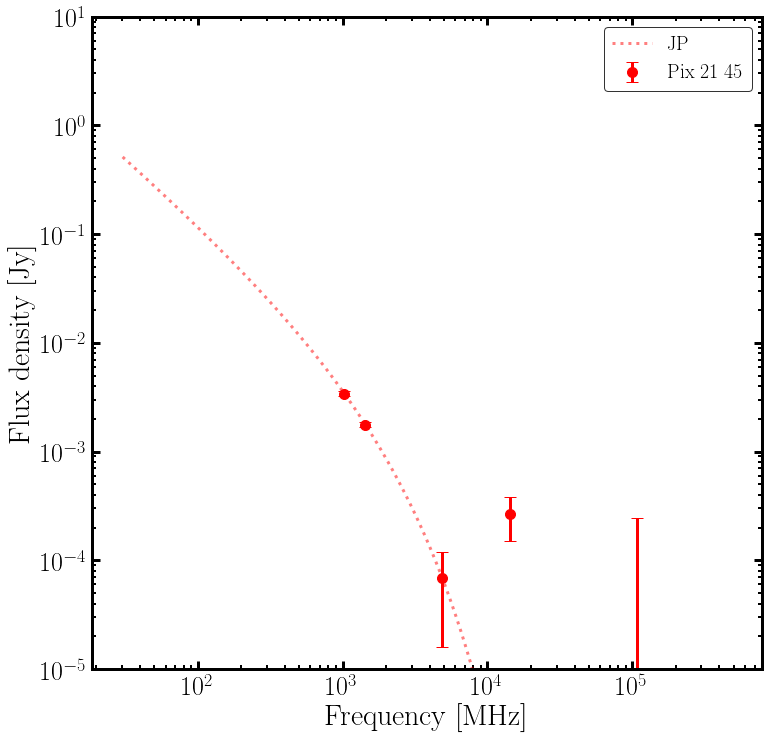

In [5]:

for j in xrange(0,len(table['X'])):
    px = str(table['X'][j])
    py = str(table['Y'][j])
    pixs = px+'_'+py
    pixLabel = px+' '+py
    for i in xrange(0,2):
        modName = pixDir+label[i]+'/'+'JP_pix_'+pixs+'.dat'
        modPix1 = syn.readCIMod(modName)
        
        datName = pixDir+label[i]+'/pix_'+pixs+'.dat'
        pix1= ascii.read(datName, fast_reader=False)
        
        outplot=figDir+pixs+'_'+label[i]+'_JP.png'
        plot_pix(pix1,modPix1,pixLabel,'green',outplot)